<a href="https://colab.research.google.com/github/simaadleyba/CS412-Spring-23-24/blob/main/CS412_HW3_SimaAdleyba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In this homework, you are required to implement logistic regression using gradient descent from scratch. The goal is to solidify your understanding of the logistic regression model and the gradient descent optimization algorithm within the context of a binary classification task.
You will use a preprocessed version of the Titanic dataset, which contains data about Titanic passengers. You will predict if a passenger survived or not based on his/her age, sex and passenger class. In the sex column, 1 shows the passenger is female and 2 shows that the passenger is male.


## 1. Load the dataset and preprocess the data:
*   Set your random seed to 42.
*   Split the data into training, validation and test sets (60% , 20% , 20% ).
*   As the data ranges vary significantly across the feature dimensions, you should scale your features. Scale them linearly within the 0-1 range. Be careful not to include the test data when scaling. You can use StandartScaler for that.


### Import statements and loading data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data
titanic_data_path = "/content/titanicdata.csv"
titanic_data = pd.read_csv(titanic_data_path)

### Preprocess data


In [ ]:
# Drop target column
X = titanic_data.drop('Survived', axis=1)

# Set the target/output variable
y = titanic_data['Survived']

# Ensure that y is a numpy array to avoid possible future errors
y = y.to_numpy()

# Set random state to 42
# Split the data into training, validation and test sets (60% , 20% , 20% )
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle = True, random_state=42)

# Initialize the scaler and scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## 2. Implement the logistic regression model


*   Initialize the model parameters w.
*   Implement the sigmoid function.
*   Implement the cost function.
*   Implement the gradient descent algorithm to minimize the cost function, updating the parameters as w







In [ ]:
# Implement the sigmoid function.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



def compute_cost(X, y, w, b):

    # Get the shapes
    m, n = X.shape

    # Set total loss to 0
    loss_sum = 0

    # Loop over each training example
    for i in range(m):

        # Set sum to 0
        sum_of_feature_products = 0

        # Loop over each feature
        for j in range(n):

            # Calculate the linear combination
            sum_of_feature_products += w[j] * X[i, j]

        # Add bias
        sum_of_feature_products += b

        # Convert to probability using sigmoid
        f_wb = sigmoid(sum_of_feature_products)

        # Calculate logistic regression loss for each example
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        loss_sum += loss

    # Find the average
    total_cost = (1 / m) * loss_sum

    return total_cost



def compute_gradient(X, y, w, b):

    # Get the shapes
    m, n = X.shape

    # Set gradients to 0
    gradient_wrt_w = np.zeros(w.shape)
    gradient_wrt_b = 0

    # For each training eaxmple
    for i in range(m):

        # Set sum to 0
        sum_of_feature_products = 0

        # Loop over each feature
        for j in range(n):

            # Add the corresponding term to sum_of_feature_products
            sum_of_feature_products += w[j] * X[i, j]

        # Add bias
        sum_of_feature_products += b

        # Convert to probability using sigmoid
        f_wb = sigmoid(sum_of_feature_products)

        # Calculate the gradient
        gradient_wrt_b += f_wb - y[i]

        # Get gradient_wrt_w  for each attribute
        for j in range(n):

            # Calculate the gradient for corresponding example/feature pair
            gradient_wrt_w[j] += (f_wb - y[i]) * X[i][j]

    # Divide gradient_wrt_w and gradient_wrt_b by total number of examples
    gradient_wrt_w = gradient_wrt_w / m
    gradient_wrt_b = gradient_wrt_b / m

    return gradient_wrt_b, gradient_wrt_w



def gradient_descent(X_train, y_train, X_val, y_val, w, b, cost_function, gradient_function, step_size, iterations):

    # Number of training examples
    m = X_train.shape[0]

    # Arrays to store cost for graphing later
    training_losses = []
    validation_losses = []

    # Loop over iterations times
    for i in range(iterations):

        # Calculate the gradient and update the parameters
        gradient_wrt_b, gradient_wrt_w = gradient_function(X_train, y_train, w, b)

        # Update parameters
        w -= step_size * gradient_wrt_w
        b -= step_size * gradient_wrt_b

        # Save the cost for training and validation
        training_loss = cost_function(X_train, y_train, w, b)
        training_losses.append(training_loss)

        # Compute validation loss too if needed
        if X_val is not None and y_val is not None:
            val_loss = cost_function(X_val, y_val, w, b)
            validation_losses.append(val_loss)

    return w, b, training_losses, validation_losses

## 3. Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation data. Plot both the training and validation losses across 100 iterations.

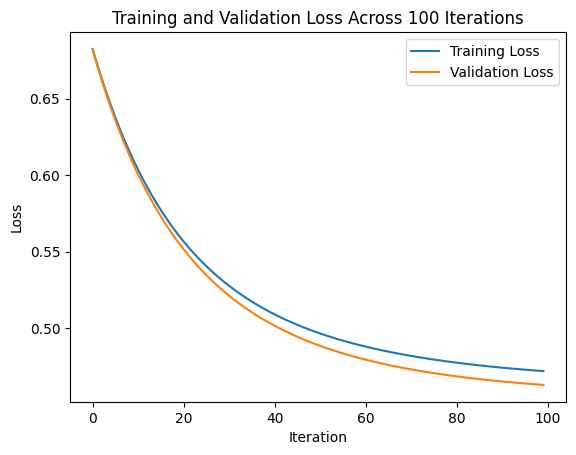

In [ ]:
# Set random seed to 42
np.random.seed(42)

# Set initial values of weight and bias
w_initial = np.zeros(X_train_scaled.shape[1])
b_initial = 0.

# Set itarations to 100 and step size to 0.1
iterations = 100
step_size = 0.1

# Run gradient descent
w, b, training_losses, validation_losses = gradient_descent(
  X_train_scaled, y_train, X_val_scaled, y_val, w_initial, b_initial,
  compute_cost, compute_gradient, step_size, iterations
)

# Plot training and validation loss
plt.plot(training_losses, label = 'Training Loss')
plt.plot(validation_losses, label = 'Validation Loss')
plt.title('Training and Validation Loss Across 100 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values of these hyperparameters.



Best Step Size: 0.1
Best Iterations: 250
Best Validation Loss: 0.4553290605730902


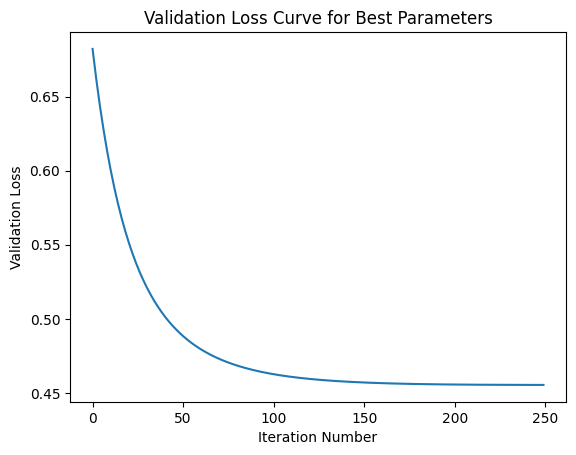

In [ ]:
# Set step sizes
step_sizes = [0.01, 0.05, 0.1, 0.2]

# Set number of iterations
iterations_list = [50, 100, 250, 500, 1000]

# Set the best loss to a high number as we'll get a smaller number
best_loss = float('inf')

# We don't have a best step size yet
best_step_size = None

# We don't have a best # of iterations yet
best_iterations = None

# A dictionary to store information of combinations
loss_history = {}

# Loop over each step size
for step_size in step_sizes:

    # Loop over each # of iterations
    for iterations in iterations_list:

        # Initialize weights and bias
        np.random.seed(42)
        w_initial = np.zeros(X_train_scaled.shape[1])
        b_initial = 0

        # Run gradient descent
        w, b, training_losses, validation_losses = gradient_descent(
          X_train_scaled, y_train, X_val_scaled, y_val, w_initial, b_initial,
          compute_cost, compute_gradient, step_size, iterations
        )

        # Track loss history
        loss_history[(step_size, iterations)] = validation_losses

        # Get the last validation loss from the list for current combination
        current_validation_loss = validation_losses[-1]

        # Update best parameters if current loss is lower than the lowest we had before
        if current_validation_loss < best_loss:
            best_loss = current_validation_loss
            best_step_size = step_size
            best_iterations = iterations

# Print the results
print(f"Best Step Size: {best_step_size}\nBest Iterations: {best_iterations}\nBest Validation Loss: {best_loss}")

# Plot the best loss history
best_loss_history = loss_history[(best_step_size, best_iterations)]
plt.plot(best_loss_history)
plt.title(f'Validation Loss Curve for Best Parameters')
plt.xlabel('Iteration Number')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## 5. Combine the validation and training data and retrain the final model with the chosen hyperparameters.

In [ ]:
# Combine training and validation data
X_combined = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

# Set step size, # of iterations, weights and bias
step_size = best_step_size
iterations = best_iterations
w_final = np.zeros(X_train_scaled.shape[1])
b_final = b

# Run gradient descent
w_final, b_final, final_losses, _ = gradient_descent(
    X_combined, y_combined, None, None, w_final, b_final,
    compute_cost, compute_gradient, best_step_size, best_iterations
)

## 6. Evaluate the accuracy of your model on the testing data and report the results.

In [ ]:
def predict(X, w, b):

    # Set number of examples
    m, n = X.shape

    # Initialize predictions
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):
        sum_of_feature_products = 0

        # Loop over each feature
        for j in range(n):

            # Calculate the linear combination
            sum_of_feature_products += w[j] * X[i, j]

        # Add bias
        sum_of_feature_products += b

        # Calculate the probability using sigmoid function
        prob = sigmoid(sum_of_feature_products)

        # Convert probability to 0 or 1 based on threshold
        p[i] = int(prob >= 0.5)

    return p

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions
predictions = predict(X_test_scaled, w_final, b_final)

# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy of the logistic regression model on the test data is: {accuracy:.2f}%")

Accuracy of the logistic regression model on the test data is: 79.89%
